In [ ]:

pip install scikit-learn
pip install graphviz

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
import graphviz
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Leer el archivo Excel y cargar los datos en un DataFrame
df = pd.read_excel("C:/Users/lenovo/Desktop/Politecnico/2° Año/1° Cuatrimmestre/Aprendizaje Automático/Proyecto Machie Learning/dimension-entorno-limpio.xlsx")
df.head()

In [ ]:
# Seleccionar las columnas relevantes
columnas_relevantes = ['cat_ent', 'ind_trpu', 'ind_inunda', 'ind_evp', 'ind_cavas', 'ind_indus']
datos = df[columnas_relevantes]

In [ ]:
# Separar las características y la variable objetivo
X = datos[['ind_trpu', 'ind_inunda', 'ind_evp', 'ind_cavas', 'ind_indus']]
y = datos['cat_ent']

In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Instanciar y entrenar el modelo de árbol de decisión
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

In [ ]:
# Exportar el árbol de decisión a un archivo .dot
export_graphviz(modelo_arbol, out_file="arbol_decision.dot", feature_names=X.columns, class_names=modelo_arbol.classes_, filled=True)


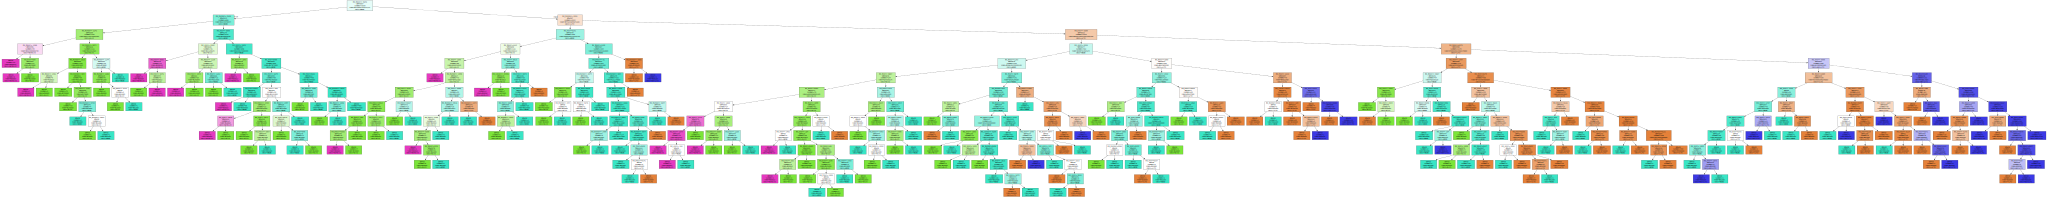

In [18]:
# Leer el archivo .dot y visualizar el árbol de decisión
with open("arbol_decision.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.render(filename='arbol_decision', format='png', cleanup=True)
graph

In [19]:
# Evaluar el rendimiento del modelo
# Realizar predicciones sobre el conjunto de prueba
y_pred_test = modelo_arbol.predict(X_test)

In [20]:
# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

Accuracy en el conjunto de prueba: 0.9138


In [21]:
# Generar y mostrar el reporte de clasificación
classification_rep = classification_report(y_test, y_pred_test)
print("Classification Report en el conjunto de prueba:\n", classification_rep)

Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

        ALTO       0.94      0.93      0.94       235
        BAJO       0.87      0.84      0.85       101
       MEDIO       0.91      0.93      0.92       295
    MUY ALTO       0.97      0.95      0.96        63
    MUY BAJO       0.69      0.79      0.73        14

    accuracy                           0.91       708
   macro avg       0.87      0.89      0.88       708
weighted avg       0.91      0.91      0.91       708



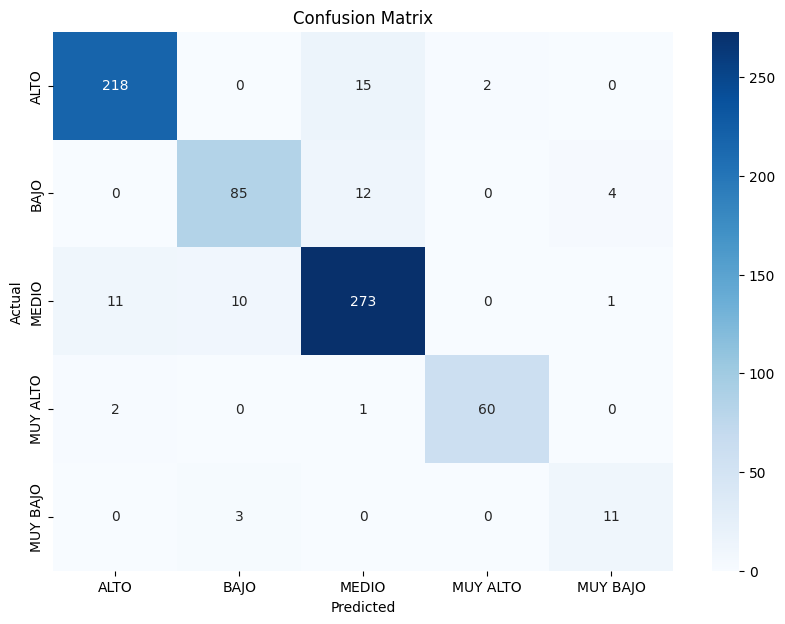

In [22]:
# Generar y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=modelo_arbol.classes_, yticklabels=modelo_arbol.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()